In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ornl-frontier.csv")

In [34]:
df["time"] = pd.to_datetime(df["datetime"])
df["power"] = df["sum vals"]
df['power [MW]'] = df["power"] / 1e6

In [30]:
core_datetime_start_string = "04/29/23 01:12:46"
core_datetime_end_string = "04/29/23 03:24:55"
core_phase_start = pd.to_datetime(core_datetime_start_string)
core_phase_end = pd.to_datetime(core_datetime_end_string)
df["time_offset [s]"] = (df["time"] - core_phase_start).dt.total_seconds()

In [31]:
print(core_phase_end - core_phase_start)

0 days 02:12:09


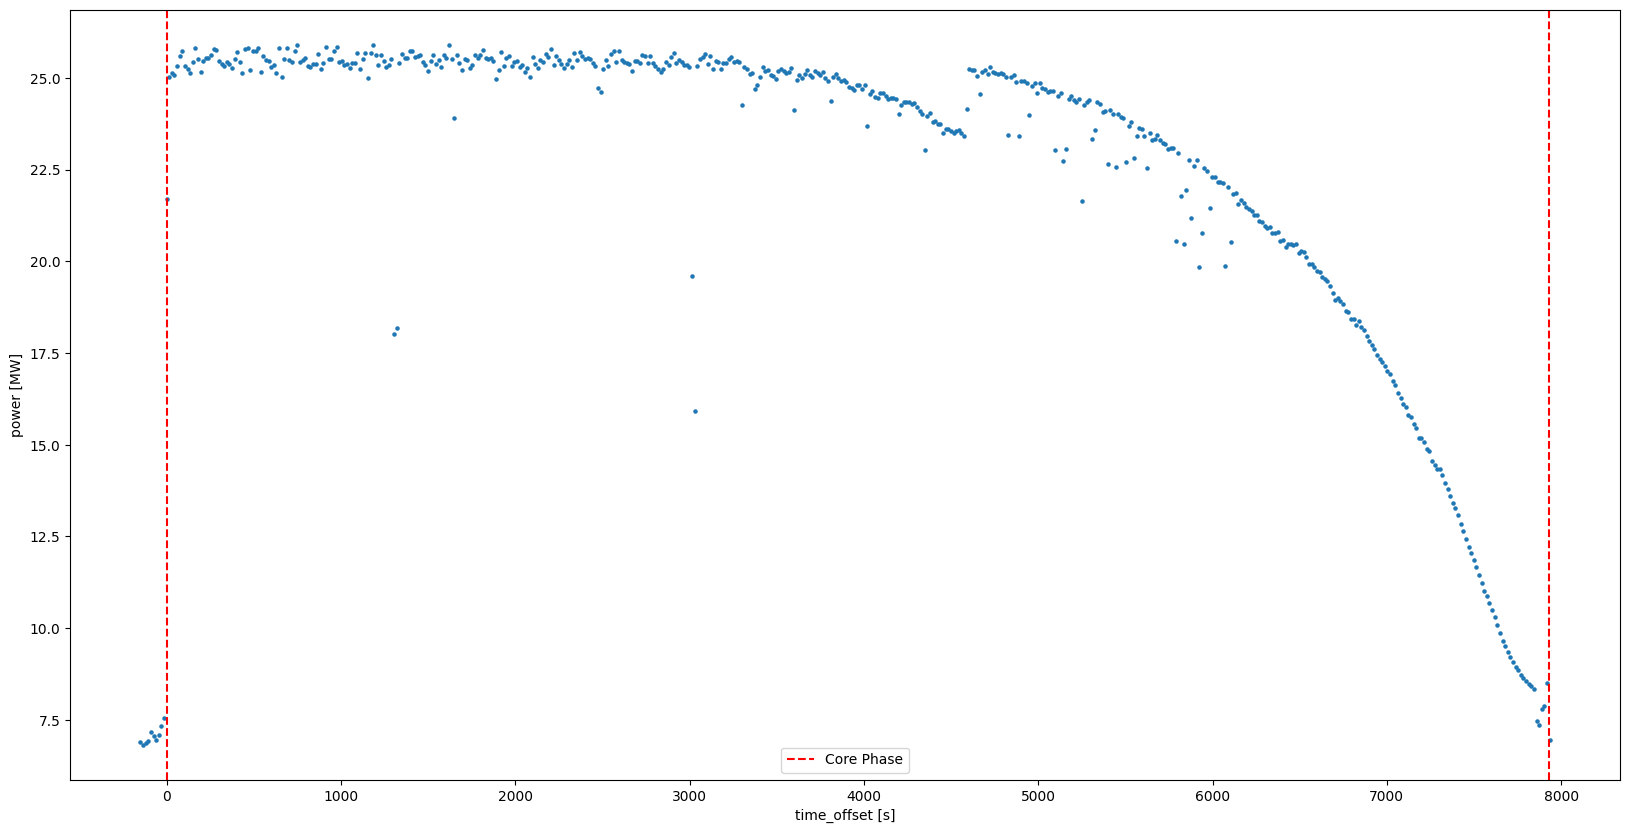

In [32]:
ax = df.plot(x="time_offset [s]", y="power [MW]", kind="scatter", figsize=(20, 10), marker=".")
ax.axvline(0, color='r', linestyle='--', label='Core Phase')
ax.axvline((core_phase_end - core_phase_start).total_seconds(), color='r', linestyle='--')
ax.legend()

true power: 22703.59 kW
Max error 0.38%, mean error 0.19%


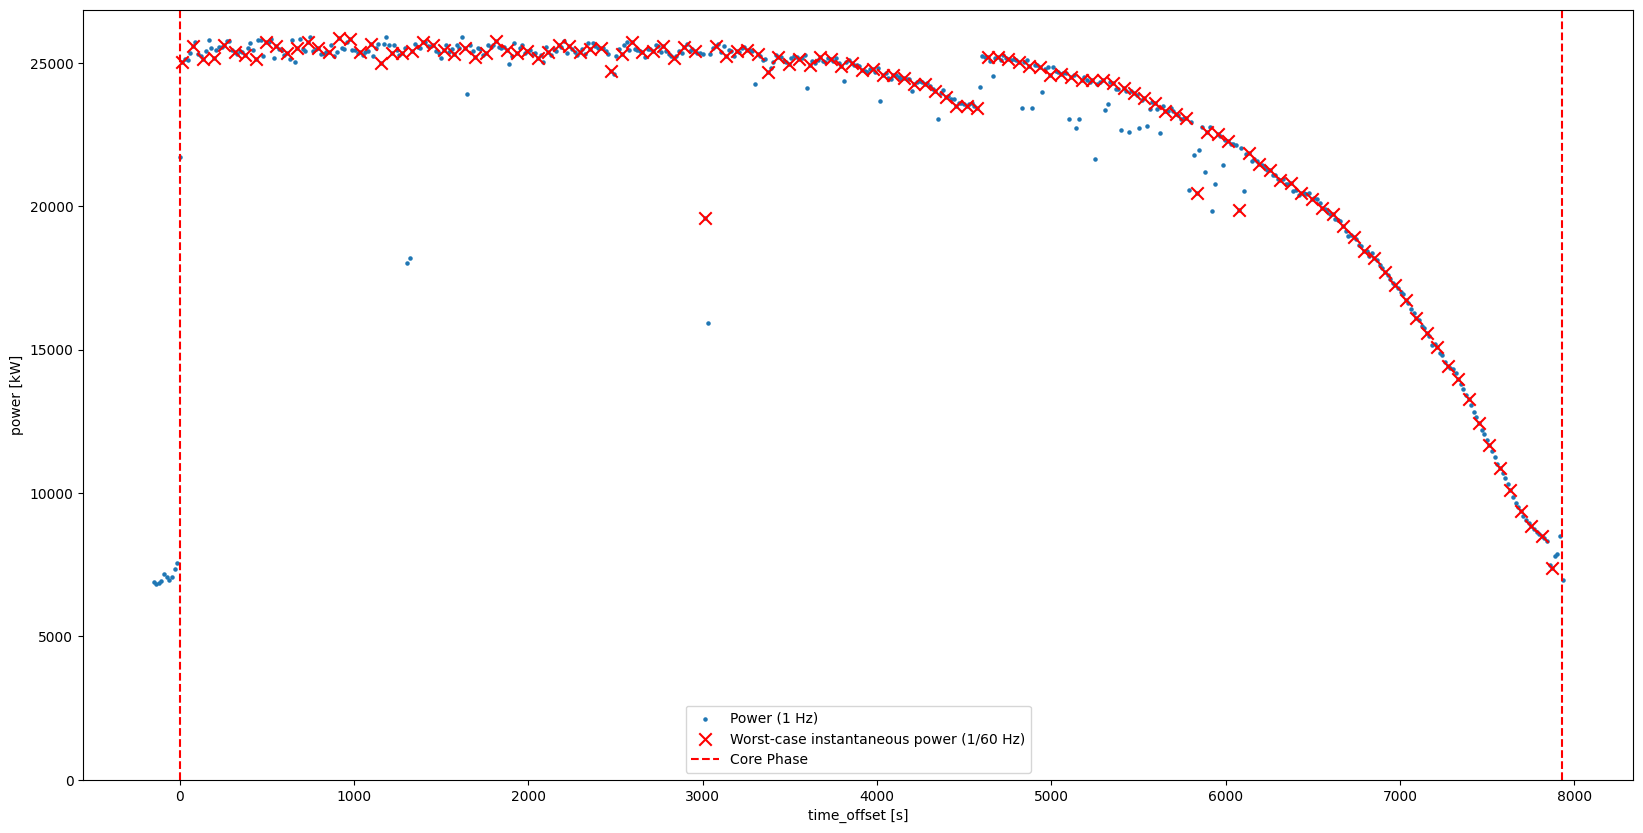

In [36]:
df_core = df[(df["time"] >= core_phase_start) & (df["time"] < core_phase_end)]
true_power = df_core.power.mean()
print(f"true power: {true_power/1000:.2f} kW")
max_error = 0
errors = []
for shift in range(0, 60, 15):
        df_shifted = df_core[df_core["time"].dt.second == shift]
        shifted_power = df_shifted.power.mean()
        error = abs(true_power - shifted_power) / true_power
        errors.append(error)
        if error > max_error:
            max_error = error
            df_worst = df_shifted

print(f"Max error {max_error:.2%}, mean error {sum(errors) / len(errors):.2%}")

ax = df.plot(x="time_offset [s]", y="power [kW]", kind="scatter", figsize=(20, 10), marker=".", label="Power (1 Hz)")
ax.set_ylim(0)
df_worst.plot(x="time_offset [s]", y="power [kW]", kind="scatter", marker="x", s=80, ax=ax, color="red", label="Worst-case instantaneous power (1/60 Hz)")
ax.axvline(0, color='r', linestyle='--', label='Core Phase')
ax.axvline((core_phase_end - core_phase_start).total_seconds(), color='r', linestyle='--')
ax.legend()

0     2021-05-27 14:31:14+00:00
1     2021-05-27 14:31:15+00:00
2     2021-05-27 14:31:16+00:00
3     2021-05-27 14:31:17+00:00
4     2021-05-27 14:31:18+00:00
                 ...           
550   2021-05-27 14:40:24+00:00
551   2021-05-27 14:40:25+00:00
552   2021-05-27 14:40:26+00:00
553   2021-05-27 14:40:27+00:00
554   2021-05-27 14:40:28+00:00
Name: time, Length: 555, dtype: datetime64[ns, UTC]